# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

597

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
response = requests.get(f"http://api.openweathermap.org/data/2.5/weather?q=seattle&appid={weather_api_key}").json()
response["coord"]["lon"]
print(response)

{'coord': {'lon': -122.33, 'lat': 47.61}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 294.77, 'feels_like': 292.66, 'temp_min': 293.15, 'temp_max': 295.93, 'pressure': 1021, 'humidity': 56}, 'visibility': 10000, 'wind': {'speed': 4.1, 'deg': 190}, 'clouds': {'all': 75}, 'dt': 1597774960, 'sys': {'type': 1, 'id': 3417, 'country': 'US', 'sunrise': 1597756207, 'sunset': 1597806975}, 'timezone': -25200, 'id': 5809844, 'name': 'Seattle', 'cod': 200}


In [4]:
#EXAMPLE EXAMPLE
#responses = []
#set_counter = 0
#counter = 0

#for city in cities:
#    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"
    
#    response = requests.get(url)
#    responses.append(response)
   
#    if set_counter == 50:
#        set_counter += 1
    
#    if counter == 40:
#        break
        
#print("Processing Record %s of Set %s | %s" % (counter, set_counter, city))

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

city_data = []

print("Beginning Data Retrieval     ")
print("-----------------------------")

record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
# Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

# Create endpoint URL with each city
    city_url = url + "&q=" + city
    
# Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

# Add 1 to the record count
    record_count += 1

# Run an API request for each of the cities
    try:
# Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

# Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_cloudiness = city_weather["clouds"]["all"]
        city_wind_speed = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
# Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng,
                          "Max Temp" : city_max_temp, 
                          "Humidity": city_humidity,
                          "Cloudiness" : city_cloudiness,
                          "Wind Speed" : city_wind_speed,
                          "Country" :  city_country,
                          "Date": city_date})

# If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vaini
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | tatarastii de sus
City not found. Skipping...
Processing Record 5 of Set 1 | tiksi
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | kemijarvi
Processing Record 8 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 9 of Set 1 | chuncheng
Processing Record 10 of Set 1 | tabas
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | santa maria
Processing Record 13 of Set 1 | auki
Processing Record 14 of Set 1 | bluff
Processing Record 15 of Set 1 | belyy yar
Processing Record 16 of Set 1 | hilo
Processing Record 17 of Set 1 | verkh-usugli
Processing Record 18 of Set 1 | cedral
Processing Record 19 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 20 of Set 1 | yanam
Processing Record 21 of Set 1 | praia da v

City not found. Skipping...
Processing Record 31 of Set 4 | nishihara
Processing Record 32 of Set 4 | salalah
Processing Record 33 of Set 4 | katsuura
Processing Record 34 of Set 4 | acajutla
Processing Record 35 of Set 4 | ketchikan
Processing Record 36 of Set 4 | buchanan
Processing Record 37 of Set 4 | upernavik
Processing Record 38 of Set 4 | east london
Processing Record 39 of Set 4 | qaanaaq
Processing Record 40 of Set 4 | turbat
Processing Record 41 of Set 4 | sambava
Processing Record 42 of Set 4 | arraial do cabo
Processing Record 43 of Set 4 | laguna
Processing Record 44 of Set 4 | kapaa
Processing Record 45 of Set 4 | jiayuguan
Processing Record 46 of Set 4 | saint george
Processing Record 47 of Set 4 | gbarnga
Processing Record 48 of Set 4 | west point
Processing Record 49 of Set 4 | ilulissat
Processing Record 0 of Set 5 | carnarvon
Processing Record 1 of Set 5 | nguiu
City not found. Skipping...
Processing Record 2 of Set 5 | agadez
Processing Record 3 of Set 5 | radenci


Processing Record 20 of Set 8 | westport
Processing Record 21 of Set 8 | bam
Processing Record 22 of Set 8 | kralendijk
Processing Record 23 of Set 8 | constitucion
Processing Record 24 of Set 8 | duz
City not found. Skipping...
Processing Record 25 of Set 8 | aklavik
Processing Record 26 of Set 8 | bud
Processing Record 27 of Set 8 | kapit
Processing Record 28 of Set 8 | yashkul
Processing Record 29 of Set 8 | greenville
Processing Record 30 of Set 8 | skalistyy
City not found. Skipping...
Processing Record 31 of Set 8 | gigmoto
Processing Record 32 of Set 8 | mantua
Processing Record 33 of Set 8 | jacareacanga
Processing Record 34 of Set 8 | lompoc
Processing Record 35 of Set 8 | donskoye
Processing Record 36 of Set 8 | muzhi
Processing Record 37 of Set 8 | belaya gora
Processing Record 38 of Set 8 | santa cruz cabralia
Processing Record 39 of Set 8 | itacare
Processing Record 40 of Set 8 | springbok
Processing Record 41 of Set 8 | felanitx
Processing Record 42 of Set 8 | almaty
Proc

Processing Record 5 of Set 12 | manokwari
Processing Record 6 of Set 12 | pombia
Processing Record 7 of Set 12 | sorvag
City not found. Skipping...
Processing Record 8 of Set 12 | metro
Processing Record 9 of Set 12 | ancud
Processing Record 10 of Set 12 | shingu
Processing Record 11 of Set 12 | college
Processing Record 12 of Set 12 | yian
City not found. Skipping...
Processing Record 13 of Set 12 | saint-francois
Processing Record 14 of Set 12 | waidhofen
Processing Record 15 of Set 12 | matay
Processing Record 16 of Set 12 | fort morgan
Processing Record 17 of Set 12 | marawi
Processing Record 18 of Set 12 | deer lake
Processing Record 19 of Set 12 | chuy
Processing Record 20 of Set 12 | igdir
Processing Record 21 of Set 12 | mahon
Processing Record 22 of Set 12 | iskateley
Processing Record 23 of Set 12 | zory
Processing Record 24 of Set 12 | abancay
Processing Record 25 of Set 12 | nexo
Processing Record 26 of Set 12 | lyngseidet
Processing Record 27 of Set 12 | vila velha
Process

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
city_data_df = pd.DataFrame(city_data)
city_data_df.count()

City          536
Lat           536
Lng           536
Max Temp      536
Humidity      536
Cloudiness    536
Wind Speed    536
Country       536
Date          536
dtype: int64

In [17]:
output_data_file = "output_data/cities.csv"
city_data_df.to_csv(output_data_file, index_label="City_ID")
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vaini,-21.20,-175.20,73.40,94,90,11.41,TO,1597775160
1,punta arenas,-53.15,-70.92,37.40,47,40,17.22,CL,1597775337
2,ushuaia,-54.80,-68.30,35.60,64,75,12.75,AR,1597775273
3,tiksi,71.69,128.87,38.93,91,100,12.48,RU,1597775046
4,rikitea,-23.12,-134.97,71.76,81,2,12.82,PF,1597775143


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [21]:
# Get the indices of cities that have humidity over 100%.
# Extract relevant fields from the data frame
# Export the City_Data into a csv
humidity_check = city_data_df.loc[(city_data_df["Humidity"] > 100)]
humidity_check.count()

City          0
Lat           0
Lng           0
Max Temp      0
Humidity      0
Cloudiness    0
Wind Speed    0
Country       0
Date          0
dtype: int64

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [23]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vaini,-21.20,-175.20,73.40,94,90,11.41,TO,1597775160
1,punta arenas,-53.15,-70.92,37.40,47,40,17.22,CL,1597775337
2,ushuaia,-54.80,-68.30,35.60,64,75,12.75,AR,1597775273
3,tiksi,71.69,128.87,38.93,91,100,12.48,RU,1597775046
4,rikitea,-23.12,-134.97,71.76,81,2,12.82,PF,1597775143


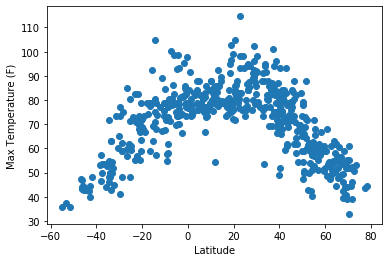

In [26]:
# Use city_data_df to crate scatter plot
# Generate a scatter plot of latitude vs. temperature
#TO DO: Add "Latitude vs. Max Temperature (08/18/20)"
plt.scatter((city_data_df["Lat"]), (city_data_df["Max Temp"]))
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.show()

## Latitude vs. Humidity Plot

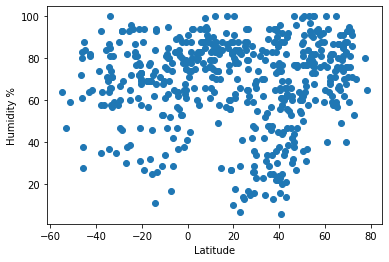

In [28]:
# Use city_data_df to crate scatter plot
# Generate a scatter plot of latitude vs. humidity
#TO DO: Add "Latitude vs. Humidity (08/18/20)"

plt.scatter((city_data_df["Lat"]), (city_data_df["Humidity"]))
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.show()

## Latitude vs. Cloudiness Plot

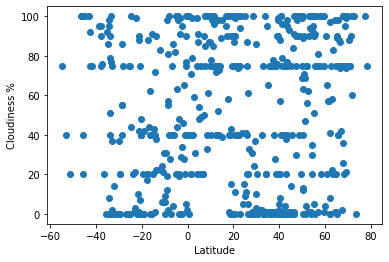

In [29]:
# Use city_data_df to crate scatter plot
# Generate a scatter plot of latitude vs. cloudiness
#TO DO: Add "Latitude vs. Cloudiness (08/18/20)"

plt.scatter((city_data_df["Lat"]), (city_data_df["Cloudiness"]))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.show()

## Latitude vs. Wind Speed Plot

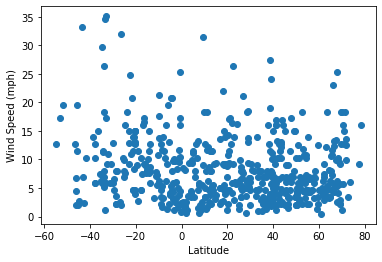

In [31]:
# Use city_data_df to crate scatter plot
# Generate a scatter plot of latitude vs. cloudiness
#TO DO: Add "Latitude vs. Wind Speed (08/18/20)"

plt.scatter((city_data_df["Lat"]), (city_data_df["Wind Speed"]))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()

## Linear Regression

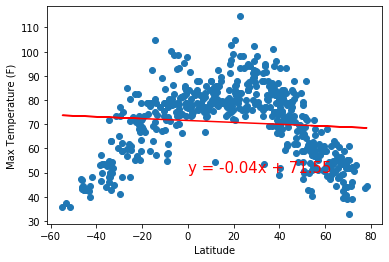

In [40]:
# OPTIONAL: Create a function to create Linear Regression plots
# linear Regression
city_data_df

(slope, intercept, rvalue, pvalue, stderr) = linregress((city_data_df["Lat"]), (city_data_df["Max Temp"]))
regress_values = (city_data_df["Lat"]) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter((city_data_df["Lat"]), (city_data_df["Max Temp"]))
plt.plot((city_data_df["Lat"]),regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.show()

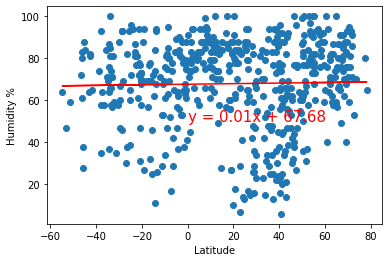

In [42]:
(slope, intercept, rvalue, pvalue, stderr) = linregress((city_data_df["Lat"]), (city_data_df["Humidity"]))
regress_values = (city_data_df["Lat"]) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter((city_data_df["Lat"]), (city_data_df["Humidity"]))
plt.plot((city_data_df["Lat"]),regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.show()

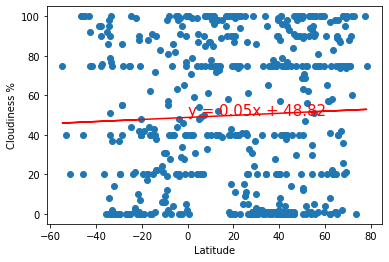

In [44]:
(slope, intercept, rvalue, pvalue, stderr) = linregress((city_data_df["Lat"]), (city_data_df["Cloudiness"]))
regress_values = (city_data_df["Lat"]) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter((city_data_df["Lat"]), (city_data_df["Cloudiness"]))
plt.plot((city_data_df["Lat"]),regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.show()

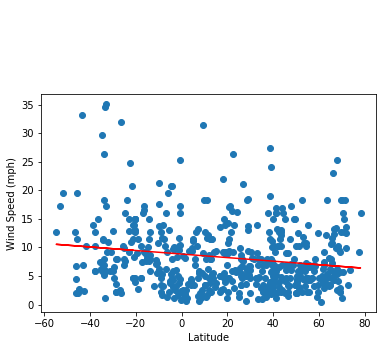

In [57]:
(slope, intercept, rvalue, pvalue, stderr) = linregress((city_data_df["Lat"]), (city_data_df["Wind Speed"]))
regress_values = (city_data_df["Lat"]) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter((city_data_df["Lat"]), (city_data_df["Wind Speed"]))
plt.plot((city_data_df["Lat"]),regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

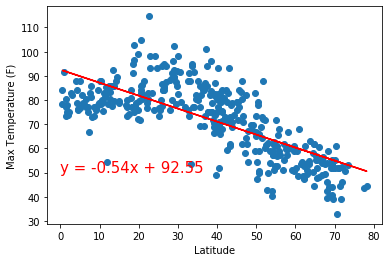

In [58]:
northern_hemisphere = city_data_df.loc[city_data_df["Lat"] >= 0]
northern_hemisphere

(slope, intercept, rvalue, pvalue, stderr) = linregress((northern_hemisphere["Lat"]), (northern_hemisphere["Max Temp"]))
regress_values = (northern_hemisphere["Lat"]) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter((northern_hemisphere["Lat"]), (northern_hemisphere["Max Temp"]))
plt.plot((northern_hemisphere["Lat"]),regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

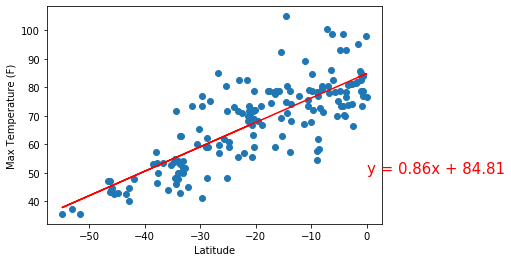

In [61]:
southern_hemisphere = city_data_df.loc[city_data_df["Lat"] < 0]
southern_hemisphere

(slope, intercept, rvalue, pvalue, stderr) = linregress((southern_hemisphere["Lat"]), (southern_hemisphere["Max Temp"]))
regress_values = (southern_hemisphere["Lat"]) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter((southern_hemisphere["Lat"]), (southern_hemisphere["Max Temp"]))
plt.plot((southern_hemisphere["Lat"]),regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

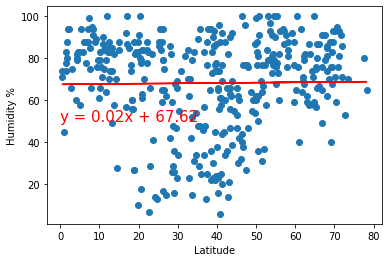

In [62]:
northern_hemisphere = city_data_df.loc[city_data_df["Lat"] >= 0]
northern_hemisphere

(slope, intercept, rvalue, pvalue, stderr) = linregress((northern_hemisphere["Lat"]), (northern_hemisphere["Humidity"]))
regress_values = (northern_hemisphere["Lat"]) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter((northern_hemisphere["Lat"]), (northern_hemisphere["Humidity"]))
plt.plot((northern_hemisphere["Lat"]),regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

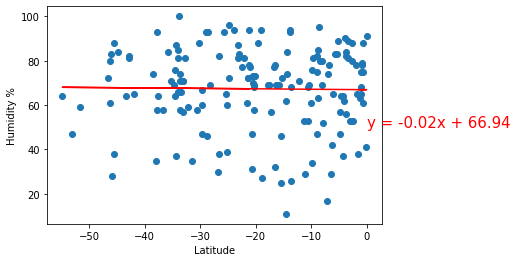

In [63]:
southern_hemisphere = city_data_df.loc[city_data_df["Lat"] < 0]
southern_hemisphere

(slope, intercept, rvalue, pvalue, stderr) = linregress((southern_hemisphere["Lat"]), (southern_hemisphere["Humidity"]))
regress_values = (southern_hemisphere["Lat"]) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter((southern_hemisphere["Lat"]), (southern_hemisphere["Humidity"]))
plt.plot((southern_hemisphere["Lat"]),regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

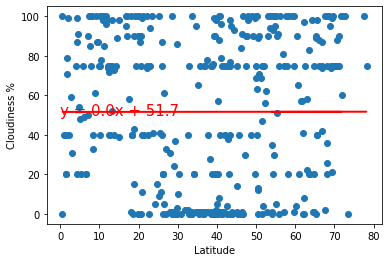

In [64]:
northern_hemisphere = city_data_df.loc[city_data_df["Lat"] >= 0]
northern_hemisphere

(slope, intercept, rvalue, pvalue, stderr) = linregress((northern_hemisphere["Lat"]), (northern_hemisphere["Cloudiness"]))
regress_values = (northern_hemisphere["Lat"]) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter((northern_hemisphere["Lat"]), (northern_hemisphere["Cloudiness"]))
plt.plot((northern_hemisphere["Lat"]),regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

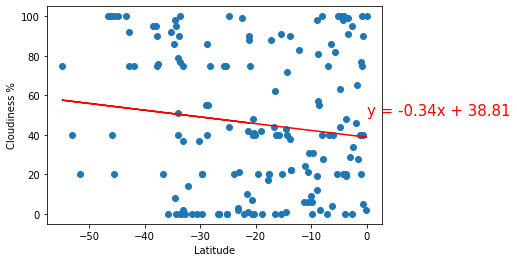

In [65]:
southern_hemisphere = city_data_df.loc[city_data_df["Lat"] < 0]
southern_hemisphere

(slope, intercept, rvalue, pvalue, stderr) = linregress((southern_hemisphere["Lat"]), (southern_hemisphere["Cloudiness"]))
regress_values = (southern_hemisphere["Lat"]) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter((southern_hemisphere["Lat"]), (southern_hemisphere["Cloudiness"]))
plt.plot((southern_hemisphere["Lat"]),regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

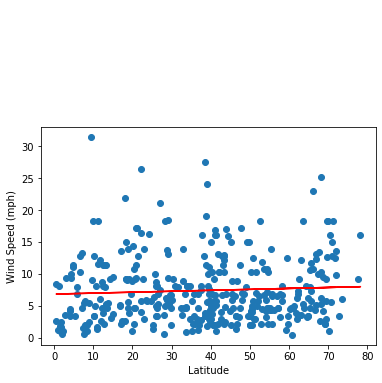

In [66]:
northern_hemisphere = city_data_df.loc[city_data_df["Lat"] >= 0]
northern_hemisphere

(slope, intercept, rvalue, pvalue, stderr) = linregress((northern_hemisphere["Lat"]), (northern_hemisphere["Wind Speed"]))
regress_values = (northern_hemisphere["Lat"]) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter((northern_hemisphere["Lat"]), (northern_hemisphere["Wind Speed"]))
plt.plot((northern_hemisphere["Lat"]),regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

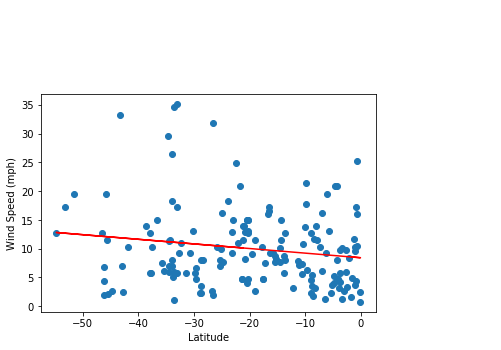

In [67]:
# Create Northern and Southern Hemisphere DataFrames
# Start with clean_df then use the .loc method to find where the northern and souther
southern_hemisphere = city_data_df.loc[city_data_df["Lat"] < 0]
southern_hemisphere

(slope, intercept, rvalue, pvalue, stderr) = linregress((southern_hemisphere["Lat"]), (southern_hemisphere["Wind Speed"]))
regress_values = (southern_hemisphere["Lat"]) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter((southern_hemisphere["Lat"]), (southern_hemisphere["Wind Speed"]))
plt.plot((southern_hemisphere["Lat"]),regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()